In [1]:
# 필요한 라이브러리와 데이터들을 불러온다

import pandas as pd
import numpy as np

money = pd.read_csv('체육진흥기금 종합 지원실적지표_202205.csv', encoding='CP949')
health = pd.read_csv('지역별 체력통계.csv', encoding='CP949')

In [2]:
money

,사업년도,프로그램명,단위사업명,단위세부사업명,지원단체명,내역사업명,세부사업명,예산액,실적금액,세출목명
0,2017,생활체육육성,생활체육 활성화,체육·문화예술사업의 지원,대한자전거연맹,문화체육사업지원,2017 One Bike One Korea Festival (자전거 화합 한마당),2.500000e+08,0.000000e+00,민간경상보조
1,2017,전문체육육성,대한체육회 지원,한국동계스포츠육성,대한체육회선수촌,동계스포츠 인프라 구축,동계스포츠 인프라구축,2.834000e+09,0.000000e+00,민간경상보조
2,2017,생활체육육성,생활체육 활성화,생활체육 정보제공 및 종목보급,사단법인 대한씨름협회,전통스포츠보급,민속씨름진흥(단오장사씨름대회 및 씨름의날 기념식),3.700000e+08,0.000000e+00,민간경상보조
3,2017,장애인체육육성,장애인체육 육성,장애인 체육활성화 지원,대한장애인체육회,장애인전문체육 지원,장애인은퇴선수 지원,2.230000e+08,0.000000e+00,민간경상보조
4,2017,장애인체육육성,장애인체육 육성,장애인 체육활성화 지원,사단법인 한국휠체어농구연맹,장애인체육법인단체 지원(한국휠체어농구연맹),휠체어농구리그제 지원,6.000000e+08,0.000000e+00,민간경상보조
...,...,...,...,...,...,...,...,...,...,...
4362,2022,생활체육육성,생활체육 활성화,생활체육 프로그램 지원,대한체육회,스포츠클럽 육성,스포츠클럽 육성,2.606700e+10,1.769972e+10,민간경상보조
4363,2022,생활체육육성,생활체육 활성화,체육·문화예술사업의 지원,대한장애인체육회,전문 인력 양성,2022 국제업무 전문인력 활동지원,3.000000e+08,9.866800e+07,민간경상보조
4364,2022,스포츠산업 육성,스포츠산업 활성화,스포츠산업활성화지원,서울올림픽기념국민체육진흥공단,첨단기술기반산업혁신,스포츠테크 프로젝트,5.000000e+09,4.000000e+09,민간경상보조
4365,2022,생활체육육성,생활체육 활성화,체육·문화예술사업의 지원,대한장애인체육회,기타 체육문화예술의 진흥,국제대회 포상금,4.050000e+09,4.050000e+09,민간경상보조


In [2]:
# 생활체육과 관련된 예산만 분류하고 사업년도로 예산의 총액을 구한다

money_need = money[money['단위사업명'].str.contains('생활체육|학교체육')]
money_year = money_need.groupby(['사업년도']).예산액.sum().reset_index()
money_year.columns = ['연도','예산액']

In [4]:
# 예산액 정보가 2017년부터 존재하므로 2017년도의 체력등급 데이터를 불러오고 측정년도로 각 등급의 총 횟수를 구한다

health_need = health[health['측정년도'] >= 2017]
health_year = health_need.groupby('측정년도')[['금상 수상 건수','은상 수상 건수','동상 수상 건수','참가상 수상 건수']].sum().reset_index()
health_year.columns = ['연도','금상','은상','동상','참가상']

In [5]:
# 연도를 기준으로 예산액 정보와 체력등급 데이터를 합친다

money_health = pd.merge(money_year, health_year)

In [6]:
# 연도와 예산액, 체력등급의 비율 상관분석을 위한 전처리 과정

money_health_ratio = money_health.copy()
money_health_ratio['금상'] = (money_health['금상'])/(money_health['금상']+money_health['은상']+money_health['동상']+money_health['참가상'])
money_health_ratio['은상'] = (money_health['은상'])/(money_health['금상']+money_health['은상']+money_health['동상']+money_health['참가상'])
money_health_ratio['동상'] = (money_health['동상'])/(money_health['금상']+money_health['은상']+money_health['동상']+money_health['참가상'])
money_health_ratio['참가상'] = (money_health['참가상'])/(money_health['금상']+money_health['은상']+money_health['동상']+money_health['참가상'])

In [7]:
# 상관분석 결과
# 연도가 지날수록 예산액은 많아졌으며 금상,은상의 비율은 높아지고 참가상의 비율은 적어졌다
# 예산액이 많아질수록 금상, 은상의 비율은 높아지고 참가상의 비율은 적어졌다
# 금상, 은상이 모든 검사항목이 백분위 50% 이상을 의미하므로 예산액이 많아질수록 국민들의 체력이 증진된다고 볼 수 있다. 
money_health_ratio.corr()

,연도,예산액,금상,은상,동상,참가상
연도,1.000000,0.955259,0.831724,0.947137,0.083504,-0.730076
예산액,0.955259,1.000000,0.842284,0.870775,0.192434,-0.785963
금상,0.831724,0.842284,1.000000,0.674082,0.085469,-0.712904
은상,0.947137,0.870775,0.674082,1.000000,-0.072633,-0.570066
동상,0.083504,0.192434,0.085469,-0.072633,1.000000,-0.716885
참가상,-0.730076,-0.785963,-0.712904,-0.570066,-0.716885,1.000000


In [8]:
# 단위사업명 중 생활체육에 직접적으로 관련된 데이터들만 추출하였다
# 사업년도, 단위사업명으로 그룹화하여 예산액 추출하였다

money_need_1 = money[money['단위사업명'].str.contains('생활체육|학교체육')]
money_year_2 = money_need_1.groupby(['사업년도','단위사업명']).예산액.sum().reset_index()

In [9]:
# 추출된 데이터를 연도별 체력등급의 데이터와 합치기 위한 데이터 전처리

yearlist = money_year_2['사업년도'].unique().tolist()
money_year_2_re = money_year_2[money_year_2['사업년도'] == 2017][['단위사업명','예산액']].copy()
money_year_2_re = money_year_2_re.set_index('단위사업명')
money_year_2_re.columns = [2017]

for index in yearlist[1:]:
    add_money = money_year_2[money_year_2['사업년도'] == index][['단위사업명','예산액']].copy()
    add_money = add_money.set_index('단위사업명')
    add_money.columns = [index]
    money_year_2_re = pd.concat([money_year_2_re, add_money], axis=1)
    
money_year_2_re = money_year_2_re.transpose().reset_index()
money_year_2_re.columns = ['연도','생활체육 활성화','생활체육시설 지원','학교체육 육성','시도 생활체육 지원']
money_year_2_re = money_year_2_re.fillna(0)

In [10]:
# 올바른 상관분석을 하기 위해 각 체력등급의 횟수가 아닌 비율을 구함

health_year_ratio = health_year.copy()
health_year_ratio['금상'] = health_year['금상'] / (health_year['금상'] + health_year['은상'] + health_year['동상'] + health_year['참가상'])
health_year_ratio['은상'] = health_year['은상'] / (health_year['금상'] + health_year['은상'] + health_year['동상'] + health_year['참가상'])
health_year_ratio['동상'] = health_year['동상'] / (health_year['금상'] + health_year['은상'] + health_year['동상'] + health_year['참가상'])
health_year_ratio['참가상'] = health_year['참가상'] / (health_year['금상'] + health_year['은상'] + health_year['동상'] + health_year['참가상'])

In [11]:
# 연도별 단위사업들의 예산액 총액과 연도별 체력등급의 비율을 상관분석을 위해 병합

money_health_2 = pd.merge(money_year_2_re,health_year_ratio)

In [12]:
# 상관분석 결과
# 연도와 생활체육 활성화/생활체육시설 지원은 상관관계가 있으며 해당 단위사업들에 대한 예산액은 늘고 있음을 알 수 있음
# 단위사업들 중 생활체육시설 지원에 대한 예산액이 많을수록 참가상의 비율이 줄어드는 것을 볼 수 있음
# 따라서 국민들의 전반적인 체력 수준을 높이기 위해서는 생활체육시설 지원에 대한 예산액을 늘려야하며,
# 학교체육 육성에 대한 예산 또한 청소년들의 체력을 높이기 위해선 필요하다.ㅠ
money_health_2.corr()

,연도,생활체육 활성화,생활체육시설 지원,학교체육 육성,시도 생활체육 지원,금상,은상,동상,참가상
연도,1.000000,0.793377,0.940771,0.217066,-0.392792,0.831724,0.947137,0.083504,-0.730076
생활체육 활성화,0.793377,1.000000,0.656701,0.234021,-0.331197,0.628896,0.813288,0.009776,-0.546713
생활체육시설 지원,0.940771,0.656701,1.000000,0.305380,-0.386191,0.894601,0.783239,0.246278,-0.817242
학교체육 육성,0.217066,0.234021,0.305380,1.000000,0.573350,0.090377,0.112351,0.956479,-0.749786
시도 생활체육 지원,-0.392792,-0.331197,-0.386191,0.573350,1.000000,-0.356088,-0.345065,0.645337,-0.187243
금상,0.831724,0.628896,0.894601,0.090377,-0.356088,1.000000,0.674082,0.085469,-0.712904
은상,0.947137,0.813288,0.783239,0.112351,-0.345065,0.674082,1.000000,-0.072633,-0.570066
동상,0.083504,0.009776,0.246278,0.956479,0.645337,0.085469,-0.072633,1.000000,-0.716885
참가상,-0.730076,-0.546713,-0.817242,-0.749786,-0.187243,-0.712904,-0.570066,-0.716885,1.000000


In [13]:
money_health_2

,연도,생활체육 활성화,생활체육시설 지원,학교체육 육성,시도 생활체육 지원,금상,은상,동상,참가상
0,2017,1.095042e+11,3.760000e+09,1.997200e+10,0.000000e+00,0.018767,0.109920,0.166220,0.705094
1,2018,1.656621e+11,1.358444e+11,3.875369e+10,1.960000e+10,0.031423,0.113620,0.256358,0.598599
2,2019,2.169289e+11,2.988383e+11,3.610353e+10,0.000000e+00,0.038468,0.114051,0.241105,0.606375
3,2020,2.485154e+11,3.727998e+11,2.668364e+10,0.000000e+00,0.070290,0.122190,0.208010,0.599510
4,2021,5.152458e+11,3.374646e+11,3.241202e+10,0.000000e+00,0.055284,0.138844,0.207117,0.598755
5,2022,3.173076e+11,4.546706e+11,3.114894e+10,0.000000e+00,0.057332,0.145428,0.212155,0.585084


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = money_health_ratio.copy()
df = df.dropna()

In [15]:
money_health_ratio

,연도,예산액,금상,은상,동상,참가상
0,2017,1.332362e+11,0.018767,0.109920,0.166220,0.705094
1,2018,3.598602e+11,0.031423,0.113620,0.256358,0.598599
2,2019,5.518708e+11,0.038468,0.114051,0.241105,0.606375
3,2020,6.479989e+11,0.070290,0.122190,0.208010,0.599510
4,2021,8.851224e+11,0.055284,0.138844,0.207117,0.598755
5,2022,8.031272e+11,0.057332,0.145428,0.212155,0.585084


In [16]:
ndf = df[['예산액','참가상']]

X = ndf[['예산액']]
y = ndf['참가상']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('Train Set: ', X_train.shape)
print('Test Set: ', X_test.shape)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()   
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print(r_square)

Train Set:  (4, 1)
Test Set:  (2, 1)
0.10776071766788287


C:\Users\Junyong\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Junyong\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Junyong\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Junyong\anaconda3\lib\site-packages\IPython\core\pylabtools.py

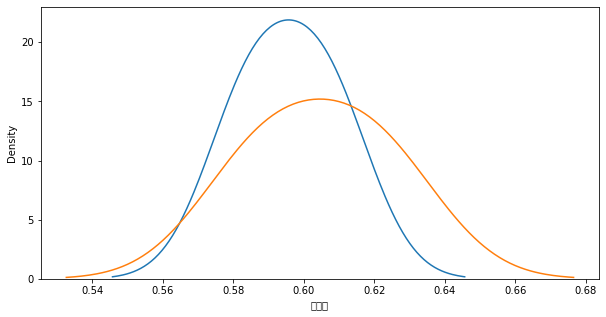

In [17]:
y_hat = lr.predict(X_test)
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test") 
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [18]:
money_year

,연도,예산액
0,2017,1.332362e+11
1,2018,3.598602e+11
2,2019,5.518708e+11
3,2020,6.479989e+11
4,2021,8.851224e+11
5,2022,8.031272e+11


In [19]:
money_health_2

,연도,생활체육 활성화,생활체육시설 지원,학교체육 육성,시도 생활체육 지원,금상,은상,동상,참가상
0,2017,1.095042e+11,3.760000e+09,1.997200e+10,0.000000e+00,0.018767,0.109920,0.166220,0.705094
1,2018,1.656621e+11,1.358444e+11,3.875369e+10,1.960000e+10,0.031423,0.113620,0.256358,0.598599
2,2019,2.169289e+11,2.988383e+11,3.610353e+10,0.000000e+00,0.038468,0.114051,0.241105,0.606375
3,2020,2.485154e+11,3.727998e+11,2.668364e+10,0.000000e+00,0.070290,0.122190,0.208010,0.599510
4,2021,5.152458e+11,3.374646e+11,3.241202e+10,0.000000e+00,0.055284,0.138844,0.207117,0.598755
5,2022,3.173076e+11,4.546706e+11,3.114894e+10,0.000000e+00,0.057332,0.145428,0.212155,0.585084


In [20]:
money_health_3 = pd.merge(money_year,money_health_2)

In [21]:
money_health_3['금/은/동'] = 1-money_health_3['참가상']
money_health_3.to_csv('flourish.csv')

In [22]:
money_year_2

,사업년도,단위사업명,예산액
0,2017,생활체육 활성화,1.095042e+11
1,2017,생활체육시설 지원,3.760000e+09
2,2017,학교체육 육성,1.997200e+10
3,2018,생활체육 활성화,1.656621e+11
4,2018,생활체육시설 지원,1.358444e+11
5,2018,시도 생활체육 지원,1.960000e+10
6,2018,학교체육 육성,3.875369e+10
7,2019,생활체육 활성화,2.169289e+11
8,2019,생활체육시설 지원,2.988383e+11
9,2019,학교체육 육성,3.610353e+10


In [3]:
money_year

,연도,예산액
0,2017,1.332362e+11
1,2018,3.598602e+11
2,2019,5.518708e+11
3,2020,6.479989e+11
4,2021,8.851224e+11
5,2022,8.031272e+11
